In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
from iprompt import prompt_classification
gptj_model = prompt_classification.create_model('EleutherAI/gpt-j-6B')

2023-03-19 12:57:17.480646: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-19 12:57:17.669705: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-19 12:57:17.709190: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-03-19 12:57:18.806149: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

In [3]:
## Compute accuracy given correct prompt and save for each task.
import argparse
from tqdm.notebook import tqdm
from iprompt.data import get_data


data = []
print('calculating accs...')
n_shots = 1
batch_size = 8

"""
task_name: str = 'add_two',
n_shots: int = 1,
train_split_frac: float = None,
max_dset_size: int = 10000,
template_num_task_phrasing: int = 0,
max_digit: int = 10, 
"""

default_args = {}
for task_name in tqdm(['imdb_train', 'sst2_train', 'rt_train']):
    for n_shots in tqdm([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], leave=False, colour='purple'):
        verbose = False
        max_length = 1024
        args = argparse.Namespace(**default_args)
        args.task_name = task_name.replace('_train', '_test')
        args.train_split_frac = 1.0 # take 100% of test set
        args.n_shots = n_shots
        args.max_dset_size = 200 # 1000
        print("*-*-" * 20)
        print(args.task_name)
        (dset, __dset_test), check_answer_func, descr = get_data(
            args.task_name, n_shots=n_shots, train_split_frac=args.train_split_frac,
            max_dset_size=args.max_dset_size, template_num_task_phrasing=0,
        )
        # if task_name == 'task107_splash_question_to_sql':
        #     batch_size = max(1, batch_size//4)
        ####   Manual prompt  ####
        descr = "" # tmp override
        loss, acc = prompt_classification.test_model_on_task_with_prefix(
            dset=dset, model=gptj_model, prefix='', multi_token=False, verbose=verbose,
            max_length=max_length, batch_size=16, tqdm_notebook=True,
            restrict_to_valid_answers=True,
            prefix_before_input=True,
        )
        print(f'\t{n_shots} || {acc:.1f}%')
        data.append([args.task_name, args.n_shots-1, loss, acc])

calculating accs...


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
imdb_test
**loading data: imdb // test


Found cached dataset imdb (/home/jxm3/.cache/huggingface/datasets/imdb/plain_text/1.0.0/d613c88cf8fa3bab83b4ded3713f1f74830d1100e171db75bbddb80b3345c9c0)
Loading cached shuffled indices for dataset at /home/jxm3/.cache/huggingface/datasets/imdb/plain_text/1.0.0/d613c88cf8fa3bab83b4ded3713f1f74830d1100e171db75bbddb80b3345c9c0/cache-fb112935e367894d.arrow
Loading cached processed dataset at /home/jxm3/.cache/huggingface/datasets/imdb/plain_text/1.0.0/d613c88cf8fa3bab83b4ded3713f1f74830d1100e171db75bbddb80b3345c9c0/cache-2ef38a4eeeffa693.arrow
Loading cached processed dataset at /home/jxm3/.cache/huggingface/datasets/imdb/plain_text/1.0.0/d613c88cf8fa3bab83b4ded3713f1f74830d1100e171db75bbddb80b3345c9c0/cache-2c774f3564e01edb.arrow


  0%|          | 0/13 [00:00<?, ?it/s]

	1 || 77.0%
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
imdb_test
**loading data: imdb // test


Found cached dataset imdb (/home/jxm3/.cache/huggingface/datasets/imdb/plain_text/1.0.0/d613c88cf8fa3bab83b4ded3713f1f74830d1100e171db75bbddb80b3345c9c0)
Loading cached shuffled indices for dataset at /home/jxm3/.cache/huggingface/datasets/imdb/plain_text/1.0.0/d613c88cf8fa3bab83b4ded3713f1f74830d1100e171db75bbddb80b3345c9c0/cache-fb112935e367894d.arrow
Loading cached processed dataset at /home/jxm3/.cache/huggingface/datasets/imdb/plain_text/1.0.0/d613c88cf8fa3bab83b4ded3713f1f74830d1100e171db75bbddb80b3345c9c0/cache-2ef38a4eeeffa693.arrow
Loading cached processed dataset at /home/jxm3/.cache/huggingface/datasets/imdb/plain_text/1.0.0/d613c88cf8fa3bab83b4ded3713f1f74830d1100e171db75bbddb80b3345c9c0/cache-2c774f3564e01edb.arrow


  0%|          | 0/13 [00:00<?, ?it/s]

	2 || 83.5%
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
imdb_test
**loading data: imdb // test


  0%|          | 0/13 [00:00<?, ?it/s]

	3 || 87.0%
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
imdb_test
**loading data: imdb // test


  0%|          | 0/13 [00:00<?, ?it/s]

	4 || 92.5%
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
imdb_test
**loading data: imdb // test


  0%|          | 0/13 [00:00<?, ?it/s]

	5 || 92.5%
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
imdb_test
**loading data: imdb // test


  0%|          | 0/13 [00:00<?, ?it/s]

	6 || 88.5%
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
imdb_test
**loading data: imdb // test


  0%|          | 0/13 [00:00<?, ?it/s]

	7 || 89.0%
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
imdb_test
**loading data: imdb // test


  0%|          | 0/13 [00:00<?, ?it/s]

	8 || 91.5%
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
imdb_test
**loading data: imdb // test


  0%|          | 0/13 [00:00<?, ?it/s]

	9 || 90.5%
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
imdb_test
**loading data: imdb // test


  0%|          | 0/13 [00:00<?, ?it/s]

	10 || 88.5%


  0%|          | 0/10 [00:00<?, ?it/s]

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
sst2_test
**loading data: sst2 // validation


  0%|          | 0/13 [00:00<?, ?it/s]

	1 || 75.5%
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
sst2_test
**loading data: sst2 // validation


  0%|          | 0/13 [00:00<?, ?it/s]

	2 || 72.5%
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
sst2_test
**loading data: sst2 // validation


  0%|          | 0/13 [00:00<?, ?it/s]

	3 || 77.5%
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
sst2_test
**loading data: sst2 // validation


  0%|          | 0/13 [00:00<?, ?it/s]

	4 || 89.0%
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
sst2_test
**loading data: sst2 // validation


  0%|          | 0/13 [00:00<?, ?it/s]

	5 || 83.5%
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
sst2_test
**loading data: sst2 // validation


  0%|          | 0/13 [00:00<?, ?it/s]

	6 || 86.0%
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
sst2_test
**loading data: sst2 // validation


  0%|          | 0/13 [00:00<?, ?it/s]

	7 || 90.0%
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
sst2_test
**loading data: sst2 // validation


  0%|          | 0/13 [00:00<?, ?it/s]

	8 || 86.5%
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
sst2_test
**loading data: sst2 // validation


  0%|          | 0/13 [00:00<?, ?it/s]

	9 || 88.0%
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
sst2_test
**loading data: sst2 // validation


  0%|          | 0/13 [00:00<?, ?it/s]

	10 || 88.5%


  0%|          | 0/10 [00:00<?, ?it/s]

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
rt_test
**loading data: rotten_tomatoes // test


  0%|          | 0/13 [00:00<?, ?it/s]

	1 || 73.5%
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
rt_test
**loading data: rotten_tomatoes // test


  0%|          | 0/13 [00:00<?, ?it/s]

	2 || 71.5%
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
rt_test
**loading data: rotten_tomatoes // test


  0%|          | 0/13 [00:00<?, ?it/s]

	3 || 79.5%
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
rt_test
**loading data: rotten_tomatoes // test


  0%|          | 0/13 [00:00<?, ?it/s]

	4 || 82.5%
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
rt_test
**loading data: rotten_tomatoes // test


  0%|          | 0/13 [00:00<?, ?it/s]

	5 || 80.5%
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
rt_test
**loading data: rotten_tomatoes // test


  0%|          | 0/13 [00:00<?, ?it/s]

	6 || 81.0%
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
rt_test
**loading data: rotten_tomatoes // test


  0%|          | 0/13 [00:00<?, ?it/s]

	7 || 82.0%
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
rt_test
**loading data: rotten_tomatoes // test


  0%|          | 0/13 [00:00<?, ?it/s]

	8 || 85.0%
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
rt_test
**loading data: rotten_tomatoes // test


  0%|          | 0/13 [00:00<?, ?it/s]

	9 || 85.0%
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
rt_test
**loading data: rotten_tomatoes // test


  0%|          | 0/13 [00:00<?, ?it/s]

	10 || 85.0%


<AxesSubplot:xlabel='n_shots', ylabel='acc'>

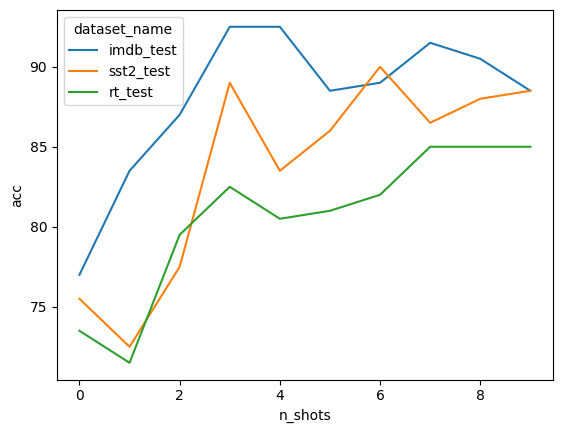

In [4]:
import seaborn as sns
df = pd.DataFrame(data, columns=['dataset_name', 'n_shots', 'loss', 'acc'])
sns.lineplot(data=df, y='acc', x='n_shots', hue='dataset_name')

In [5]:
df

,dataset_name,n_shots,loss,acc
0,imdb_test,0,-4.156096,77.0
1,imdb_test,1,-15.533145,83.5
2,imdb_test,2,-16.328027,87.0
3,imdb_test,3,-16.790664,92.5
4,imdb_test,4,-17.106250,92.5
5,imdb_test,5,-16.791191,88.5
6,imdb_test,6,-16.814961,89.0
7,imdb_test,7,-16.661484,91.5
8,imdb_test,8,-16.923672,90.5
9,imdb_test,9,-17.167188,88.5
